In [124]:
import jax.numpy as jnp
from jax import grad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import minimize,minimize_scalar
%matplotlib inline
from sklearn.model_selection import train_test_split


data = pd.read_csv('Q2.csv')
data = data[~np.isnan(data).any(axis=1)]
data_x = data.drop(labels=['transactiondate','latitude','longitude','price'],axis=1)
data_y = data['price']

min_max_scaler = preprocessing.MinMaxScaler()
data_x = min_max_scaler.fit_transform(data_x)
data_x = pd.DataFrame(data_x)
train_x,test_x,train_y,test_y = train_test_split(
    data_x,
    data_y,
    train_size = 0.5,
    shuffle=False)



In [126]:
def lossFunc(w_t, x, y):
  return (np.sum( (    (  (  (y - (w_t @ x.T) )**2 ) /4 + 1)**(1/2) - 1) ) / 204).astype(float)

def find_least_alpha(alpha, w_t, x, y):
  grad_loss = grad(lossFunc, argnums=0, allow_int=True)(w_t, one_train_x, train_y.values)
  new_w = w_t - alpha * grad_loss
  return float(np.sum(((((y - jnp.dot(new_w, x.T))**2)/4 + 1)**(1/2) - 1) ) / 204)

one_test_x = test_x.values
one_test_x = np.insert(one_test_x, 0, 1.0, axis=1)
one_train_x = train_x.values
one_train_x = np.insert(one_train_x, 0, 1.0, axis=1)
w = np.array([1,1,1,1], dtype=float)


loss_k = []

def optimize(x_k):
  
  w = np.array([1,1,1,1], dtype=float)
  x_k.append(w)

  alpha = 1
  iteration = 0
  while 1 == 1:
    W_grad = grad(lossFunc, argnums=0, allow_int=True)(w.T, one_train_x, train_y.values)
    loss_k.append(lossFunc(w.T, one_train_x, train_y.values))
    
    w = w - alpha * W_grad
    x_k.append(w)
    print(loss_k[-1], "  ", alpha, "  ", w)
    # mini = minimize(find_least_alpha, x0=alpha, method="BFGS", args=(x_k[-1].T, one_train_x, train_y.values))
    mini = minimize_scalar(find_least_alpha , args=(x_k[-1].T, one_train_x, train_y.values))
    alpha = mini.x
    iteration += 1
    if (iteration > 1):
      if (loss_k[-1] < 2.5):
        return iteration
x_k = []
iteration = optimize(x_k)
print(iteration)

17.23457023433114    1    [1.4985166 1.2077476 1.0820328 1.2069662]
16.893373    49.08480752548586    [25.961243  11.401823   5.1060953 11.363987 ]
4.745827    377.15421202453587    [ 29.253014  -9.342226 -13.179839  31.364304]
2.7616937    17.167827645088444    [ 30.319523  -9.193083 -13.147244  31.372623]
2.727681    69.15799146639266    [ 30.50682  -10.328946 -13.897498  29.95057 ]
2.6990716    16.658217280627234    [ 31.391575 -10.192677 -13.919714  29.970219]
2.6749542    68.63542104136489    [ 31.54875  -11.115576 -14.760454  28.82013 ]
2.653289    16.213584033843123    [ 32.308186 -10.978801 -14.807313  28.847437]
2.6349638    66.64903271638966    [ 32.4256   -11.713019 -15.637159  27.882858]
2.6183553    16.053858260644397    [ 33.090183 -11.576363 -15.697246  27.910913]
2.6040282    65.44801300065704    [ 33.174927 -12.165575 -16.485525  27.062725]
2.5909138    16.10617004841281    [ 33.768505 -12.028823 -16.553875  27.090153]
2.5793507    65.48717098677898    [ 33.829388 -12.

The total iteration:24
The final weight vector is[ 36.262196 -13.278603 -20.989244  23.271177]
The train loss is 2.4960882663726807
The test loss is 2.7308456897735596


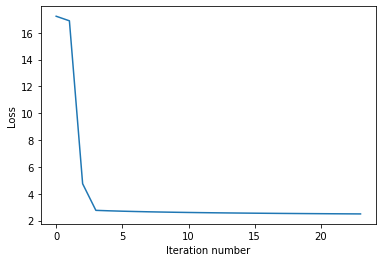

In [127]:
print(f"The total iteration:{iteration}")
print(f"The final weight vector is{x_k[-2]}")
print(f"The train loss is {lossFunc(x_k[-2].T, one_train_x, train_y.values)}\nThe test loss is \
{lossFunc(x_k[-1].T, one_test_x, test_y.values)}")
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_k)
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.show()

In [ ]:
len(loss_k)

# def lossFunc(w_t, x, y):
#   return np.sum((jnp.sqrt(((y - jnp.dot(w_t, x.T))**2)/4 + 1) - 1) ) / 204


# def grad_loss(w_t, x, y):
#   all_w.append(w_t)
#   a_loss = grad(lossFunc, argnums=0, allow_int=True)(w.T, one_train_x, train_y.values)
#   return a_loss


# def find_least_alpha(alpha, w_t, x, y):
#   grad_loss = grad(lossFunc, argnums=0, allow_int=True)(w_t, one_train_x, train_y.values)
#   new_w = w_t - alpha * grad_loss
#   return np.sum(((((y - jnp.dot(new_w, x.T))**2)/4 + 1)**(1/2) - 1) ) / 204
# grad_loss = grad(lossFunc, argnums=0, allow_int=True)(w.T, one_train_x, train_y.values)
# mini = minimize_scalar(find_least_alpha, args=(x_k[-1].T, one_train_x, train_y.values))
# mini


25